In [11]:
import pandas as pd

In [12]:
# Load the training dataset
train_df = pd.read_csv("train.csv")

# Load the test dataset
test_df = pd.read_csv("test.csv")

# Load the sample submission dataset
submission_df = pd.read_csv("SampleSubmission.csv")



In [13]:
train_df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
print(train_df.info())
print(train_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None
             sl_no      gender       ssc_p    ssc_b       hsc_

In [15]:
test_df.head()

,sl_no,gender,salary
0,123,1,236000.000000
1,199,1,288655.405405
2,138,0,225000.000000
3,137,1,288655.405405
4,76,1,288655.405405


In [16]:
print(test_df.info())
print(test_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl_no   43 non-null     int64  
 1   gender  43 non-null     int64  
 2   salary  43 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB
None
            sl_no     gender         salary
count   43.000000  43.000000      43.000000
mean   109.511628   0.418605  291360.150849
std     56.870518   0.499169   74495.346053
min     11.000000   0.000000  216000.000000
25%     71.000000   0.000000  250000.000000
50%    103.000000   0.000000  288655.405405
75%    151.500000   1.000000  288655.405405
max    210.000000   1.000000  650000.000000


In [17]:
submission_df.head()

,Id,Salary
0,123,0
1,199,0
2,138,0
3,137,0
4,76,0


In [18]:
print(submission_df.info())
print(submission_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      43 non-null     int64
 1   Salary  43 non-null     int64
dtypes: int64(2)
memory usage: 820.0 bytes
None
               Id  Salary
count   43.000000    43.0
mean   109.511628     0.0
std     56.870518     0.0
min     11.000000     0.0
25%     71.000000     0.0
50%    103.000000     0.0
75%    151.500000     0.0
max    210.000000     0.0


In [19]:
# 2. Data Preprocessing (20 points)
# •
# 5 points: Comprehensive exploratory data analysis (EDA) is conducted.
# •
# 5 points: Missing values are handled appropriately.
# •
# 5 points: Categorical features and target variable are encoded correctly.
# •
# 5 points: Data is split into training and test sets effectively (e.g., 70% training, 30% test).

In [20]:
from sklearn.preprocessing import StandardScaler
# Drop the 'sl_no' column as it's just a serial number
train_df.drop("sl_no", axis=1, inplace=True)

# Encode binary categorical variables (gender, workex, status)
train_df["workex"] = train_df["workex"].map({"Yes": 1, "No": 0})
train_df["status"] = train_df["status"].map({"Placed": 1, "Not Placed": 0})

# Fill missing salary values with the median salary
train_df["salary"].fillna(train_df["salary"].median(), inplace=True)

# One-hot encode other categorical columns
train_df = pd.get_dummies(train_df, columns=["ssc_b", "hsc_b", "hsc_s", "degree_t", "specialisation"], drop_first=True)

# Convert all boolean columns (True/False) into integers (1/0)
bool_cols = train_df.select_dtypes(include="bool").columns
train_df[bool_cols] = train_df[bool_cols].astype(int)

# Identify numeric columns for scaling, exclude binary and target
binary_cols = ["gender", "workex", "status"]
num_cols = train_df.select_dtypes(include=["float64", "int64"]).columns.difference(binary_cols)

# Apply standard scaling
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Check cleaned data
print(train_df.head())

   gender     ssc_p     hsc_p  degree_p  workex   etest_p     mba_p  status  \
0       0 -0.028087  2.268812 -1.140102       0 -1.291091 -0.597647       1   
1       0  1.113369  1.103448  1.513267       1  1.087157  0.687620       1   
2       0 -0.213238  0.153313 -0.322843       0  0.218908 -0.769474       1   
3       0 -1.046417 -1.318339 -1.957362       0 -0.460592 -0.489396       0   
4       0  1.712332  0.668391  0.943909       0  1.864806 -1.164676       1   

     salary  ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  \
0 -0.144570      1.082459      0.800763        0.950082      -0.856663   
1 -1.041427     -0.923823      0.800763       -1.052541       1.167321   
2 -0.400815     -0.923823     -1.248809       -1.052541      -0.856663   
3 -0.208631     -0.923823     -1.248809       -1.052541       1.167321   
4  1.841328     -0.923823     -1.248809        0.950082      -0.856663   

   degree_t_Others  degree_t_Sci&Tech  specialisation_Mkt&HR  
0         -0.2322

/var/folders/4c/dthy1t0x1_q220nr2z759xb80000gn/T/ipykernel_87306/1964552893.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["salary"].fillna(train_df["salary"].median(), inplace=True)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [26]:
 # ---------------- Step 1:  Split dataset into features and target ---------------- #
X = train_df.drop("status", axis=1)
y = train_df["status"]

In [27]:
# Model Selection (15 points)

# 5 points: At least three different models are chosen and justified.

# 5 points: Models are suitable for the dataset and prediction task.

# 5 points: Hyperparameters are tuned appropriately for each model.

In [28]:
# ---------------- Step 2: Define and Tune Models ---------------- #

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# 2. Random Forest with Grid Search (tuning hyperparameters)
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring="accuracy")
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [30]:
# 3. SVM with RBF kernel and Grid Search
svm_param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}
svm_grid = GridSearchCV(SVC(probability=True), svm_param_grid, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

In [31]:
# ---------------- Step 3: Evaluation Function ---------------- #
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n📋 Classification Report: {model_name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()



📋 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.83      0.89      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.75      0.76        65
weighted avg       0.80      0.80      0.80        65



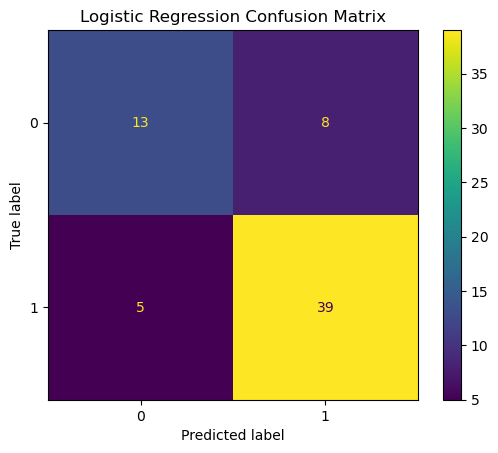


📋 Classification Report: Tuned Random Forest
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        21
           1       0.85      1.00      0.92        44

    accuracy                           0.88        65
   macro avg       0.92      0.81      0.84        65
weighted avg       0.90      0.88      0.87        65



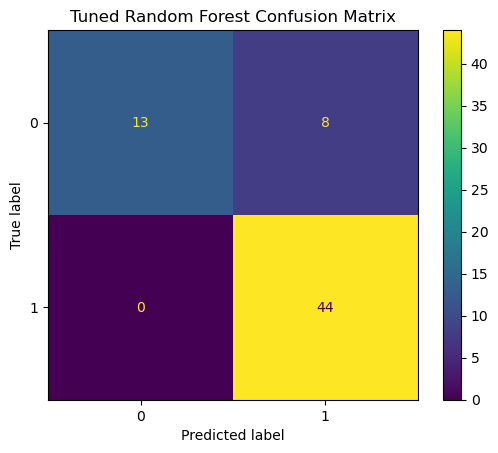


📋 Classification Report: Tuned SVM
              precision    recall  f1-score   support

           0       0.80      0.38      0.52        21
           1       0.76      0.95      0.85        44

    accuracy                           0.77        65
   macro avg       0.78      0.67      0.68        65
weighted avg       0.78      0.77      0.74        65



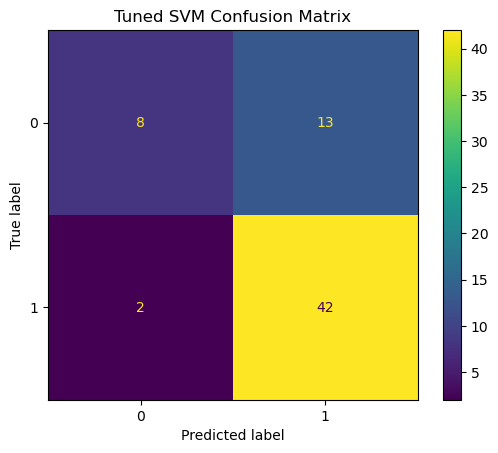

In [32]:
# ---------------- Step 4: Evaluate Each Model ---------------- #
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(best_rf, X_test, y_test, "Tuned Random Forest")
evaluate_model(best_svm, X_test, y_test, "Tuned SVM")



📋 Classification Report: Voting Classifier
              precision    recall  f1-score   support

           0       0.79      0.52      0.63        21
           1       0.80      0.93      0.86        44

    accuracy                           0.80        65
   macro avg       0.79      0.73      0.75        65
weighted avg       0.80      0.80      0.79        65



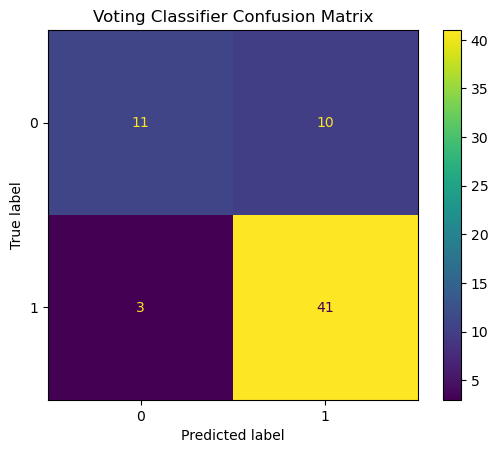

In [33]:
# ---------------- Step 5: Voting Classifier ---------------- #
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', best_rf),
        ('svm', best_svm)
    ],
    voting='soft'  # soft uses predicted probabilities
)
voting_clf.fit(X_train, y_train)
evaluate_model(voting_clf, X_test, y_test, "Voting Classifier")